### Robert Bellido

### CISB 62

### Final Project

### Fall 2023

### Professor Angel Martinon Hernandez


## 100 Sports Images Classification


Dataset: https://www.kaggle.com/datasets/gpiosenka/sports-classification

# Introduction

### Here we will utilize a dataset from Kaggle for 100 sports.  Now, we will only select a portion as it will be
### too many categories for classification.  On the same token, the dataset required more images
### because only 5 were provided for each. 


In [6]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   - -------------------------------------- 1.0/38.1 MB 22.0 MB/s eta 0:00:02
   ------- -------------------------------- 7.3/38.1 MB 93.6 MB/s eta 0:00:01
   -------------- ------------------------- 13.6/38.1 MB 222.4 MB/s eta 0:00:01
   -------------------- ------------------- 19.6/38.1 MB 165.0 MB/s eta 0:00:01
   --------------------------- ------------ 26.4/38.1 MB 162.4 MB/s eta 0:00:01
   --------------------------------- ------ 32.1/38.1 MB 217.7 MB/s eta 0:00:01
   ---------------------------------------  38.1/38.1 MB 162.4 MB/s eta 0:00:01
   ---------------------------------------  38.1/38.1 MB 162.4 MB/s eta 0:00:01
   ---------------------------------------  38.1/38.1 MB 162.4 MB/s eta 0

In [7]:
# importing pictures

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
folder = 'sports_dataset/data'

categories = [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder, name))]
categories_length = len(categories)

print(f'Categories Length:{categories_length }')
print(categories)

Categories Length:9
['arm wrestling', 'baton twirling', 'barell racing', 'air hockey', 'baseball', 'basketball', 'balance beam', 'archery', 'axe throwing']


sports_dataset/data/arm wrestling/4.jpg


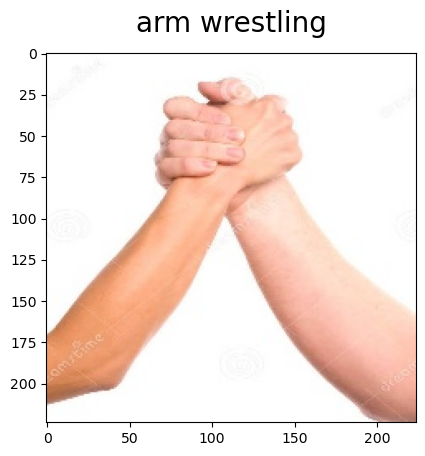

Image shape (Resolution): (224, 224, 3)
sports_dataset/data/baton twirling/4.jpg


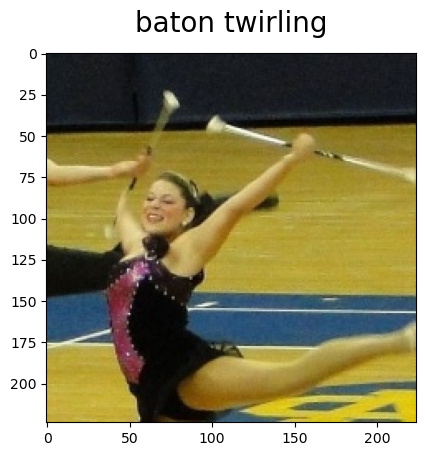

Image shape (Resolution): (224, 224, 3)
sports_dataset/data/barell racing/4.jpg


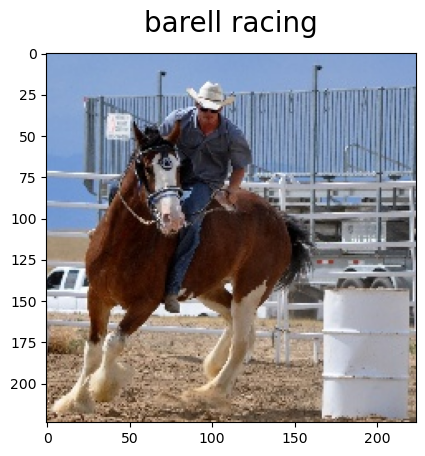

Image shape (Resolution): (224, 224, 3)
sports_dataset/data/air hockey/4.jpg


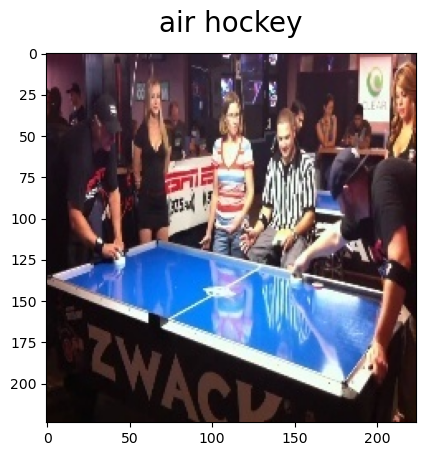

Image shape (Resolution): (224, 224, 3)
sports_dataset/data/baseball/4.jpg


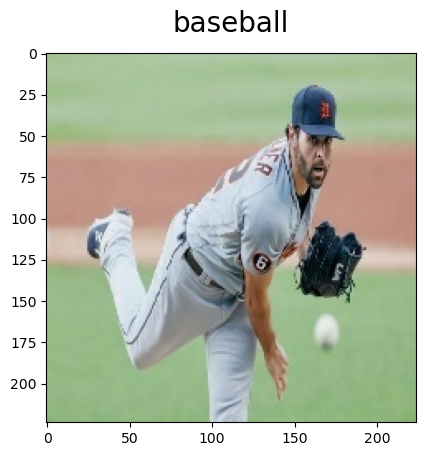

Image shape (Resolution): (224, 224, 3)
sports_dataset/data/basketball/4.jpg


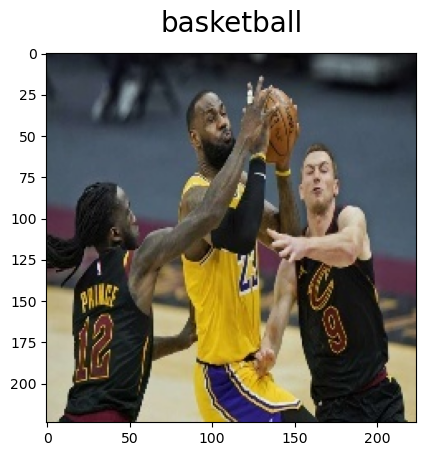

Image shape (Resolution): (224, 224, 3)
sports_dataset/data/balance beam/4.jpg


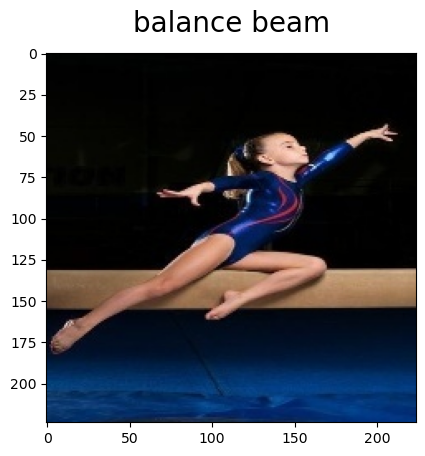

Image shape (Resolution): (224, 224, 3)
sports_dataset/data/archery/4.jpg


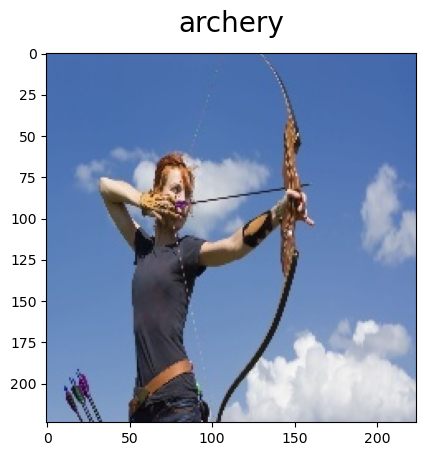

Image shape (Resolution): (224, 224, 3)
sports_dataset/data/axe throwing/4.jpg


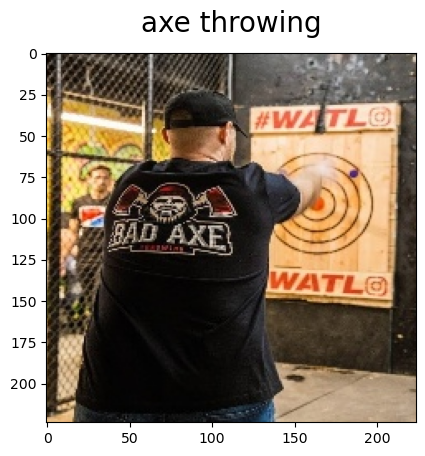

Image shape (Resolution): (224, 224, 3)


In [3]:
#choose the data path for the pictures
data_path = 'sports_dataset/data'
#label the categories
#this list will be used to itterate through the folders which contain the pictures
# categories = ['baseball','basketball','bowling','boxing','field hockey','rugby','swimming','ultimate','uneven bars','volleyball','water cycling','water polo','weightlifting','wheelchair basketball','wheelchair racing','wingsuit flying']

#create a for loop some pictures that we will be using
for category in categories:
    count = 0
    while count <= 10:
        path = os.path.join(data_path, category)
        for img in os.listdir(path):
            print(os.path.join(path,img))
            if os.path.join(path,img) == '.DS_Store':
                break
            else:
                img_array = cv2.imread(os.path.join(path,img))
        
                rgb_img = img_array[...,::-1] # change the format from BGR to RGB for matplotlib
            
        
                plt.imshow(rgb_img)
                plt.title(category, fontdict = {'fontsize':20}, pad = 15)
                plt.show()
                print(f'Image shape (Resolution): {rgb_img.shape}')
            
                count+=1
                break
        break

## Choose the resolution for the pictures

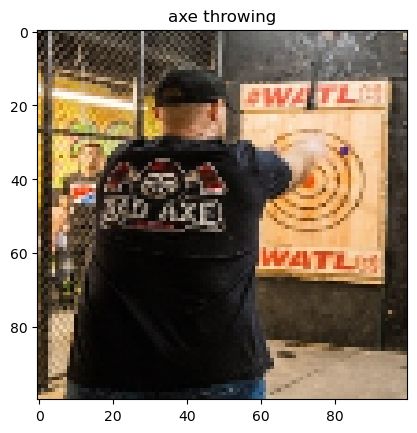

Picture shape (resolution): (100, 100, 3)


In [4]:
#choose the pixel size to normalize
img_size = 100
#show a preview for the img_size
#resize the picture
n_array = cv2.resize(rgb_img, (img_size, img_size))
#these variables are from the loop that ran before this cell
plt.title(category)
plt.imshow(n_array)
plt.show()
print(f'Picture shape (resolution): {n_array.shape}')

We will be reshaping the rest of the pictures to 100 x 100.

# Creating the dataset

In [5]:
#create the training data
training_data = []

#function to create the training data
def create_training_data():
    for category in categories:
        path = os.path.join(data_path, category) # path for the data
        class_num = categories.index(category) # create the class numbers by using the index of the category list
        #resize the data
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            n_array = cv2.resize(img_array, (img_size, img_size))
            training_data.append([n_array, class_num])
            
create_training_data()

In [6]:
print(f'Training Data Length: {len(training_data)}')

Training Data Length: 45


In [7]:
#shuffle the data
import random

random.shuffle(training_data)
#display sample of the shuffled data
for sample in training_data[:10]:
    print(sample[1])

6
4
3
5
8
6
1
0
3
7


In [8]:
X = []
y = []

#create the list of features and labels
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size,3) #-1 : all, 3 : BGR

In [9]:
print(f'Pictures: {X.shape[0]}\nPicture Resolution: {X.shape[1:3]}\nDimension: {X.shape[3]}')
print(f'Length of labels: {len(y)}')

Pictures: 45
Picture Resolution: (100, 100)
Dimension: 3
Length of labels: 45


In [10]:
plt.figure(figsize = (100,100))
img = X[4]
rgb_img1 = img[...,::-1] #change the picture to RGB to display the image using matplot
plt.imshow(rgb_img1)
ax = plt.gca()

# First turn off the  major labels, but not the major ticks
plt.tick_params(
    axis='both',        # changes apply to the both x and y axes
    which='major',      # Change the major ticks only
    bottom=True,        # ticks along the bottom edge are on
    left=True,          # ticks along the top edge are on
    labelbottom=False,  # labels along the bottom edge are off
    labelleft=False)    # labels along the left edge are off

# Next turn off the minor ticks, but not the minor labels
plt.tick_params(
    axis='both',        # changes apply to both x and y axes
    which='minor',      # Change the minor ticks only
    bottom=False,       # ticks along the bottom edge are off
    left=False,         # ticks along the left edge are off
    labelbottom=True,   # labels along the bottom edge are on
    labelleft=True)     # labels along the left edge are on
plt.title(categories[y[4]],fontdict = {'fontsize': 200})

# Set the major ticks, starting at 1 (the -0.5 tick gets hidden off the canvas)
ax.set_xticks(np.arange(-.5, 100, 1))
ax.set_yticks(np.arange(-.5, 100, 1))

# Set the minor ticks and labels
ax.set_xticks(np.arange(0, 100, 1), minor=True);
ax.set_xticklabels([str(i) for i in np.arange(0, 100, 1)], minor=True);
ax.set_yticks(np.arange(0, 100, 1), minor=True);
ax.set_yticklabels([str(i) for i in np.arange(0, 100, 1)], minor=True);

ax.grid(color='black', linestyle='-', linewidth=1.5)
_ = plt.colorbar(fraction=0.046, pad=0.04, ticks=[0,32,64,96,128,160,192,224,255])

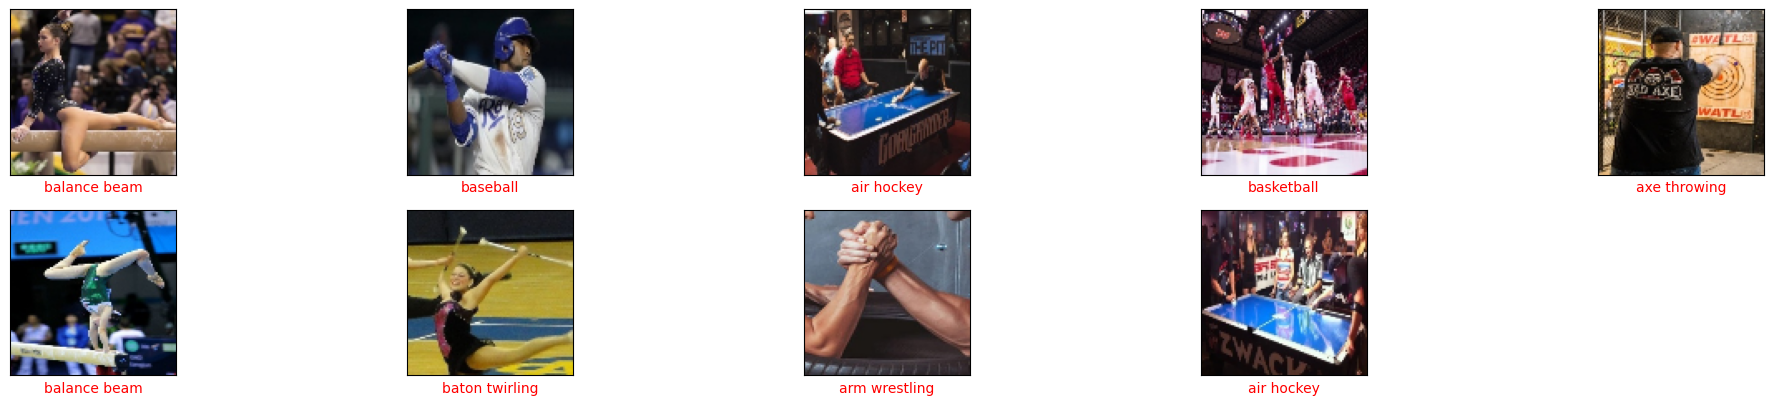

In [11]:
#set the plot size
plt.figure(figsize=(20,20))
#set a for loop to display 25 images
for k in range(categories_length):
    #set the plot grid to display 10 rows x 5 columns of pictures
    plt.subplot(10, 5, k+1)
    plt.xticks([])
    plt.yticks([])
    #display the images in X_train'
    og_img = X[k]
    rgb_img2 = og_img[...,::-1] # turn the images into RGB to display using matplot
    plt.imshow(rgb_img2)
    #display the class names under the image
    #use the class_names list 
    plt.xlabel(categories[y[k]], fontdict={'color':'red'})
    
plt.tight_layout()
plt.show()

In [12]:
#import some required libraries
import keras

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
#from keras.utils import np_utils
from keras.utils import to_categorical

Text(0.5, 1.0, 'barell racing')

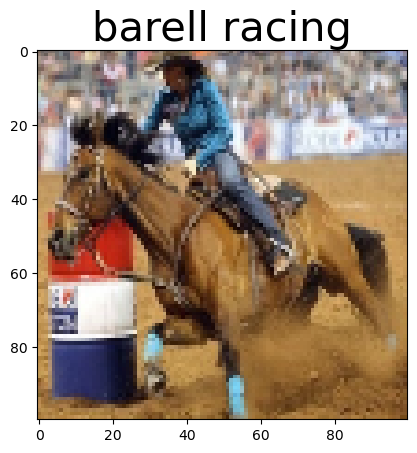

In [13]:
#print a random picture
rand_img = X[24]
plt.imshow(rand_img[...,::-1])
plt.title(categories[y[24]], fontdict = {'fontsize':30}) #print the label

# SPLIT THE DATA

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#use train test split to split the data
#because we are working with a small data set, we will set the test size to 15% of the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .15, random_state = 101)

In [16]:
#rehape the data to a three dimensional array

#get the length of the X_train, X_test
Xtrn_sz = len(X_train)
Xtst_sz = len(X_test)

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

#resize 
X_train = np.reshape(X_train, (Xtrn_sz, 100,100,3))
X_test = np.reshape(X_test, (Xtst_sz, 100,100,3))

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (38, 100, 100, 3)
X_test shape: (7, 100, 100, 3)


# ONE-HOT ENCODING

In [17]:
#use onehot encoding for y_train, y_test
#There are 100 classes (characters) to classify
n_classes = categories_length
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

y_train shape: (38, 9)
y_test shape: (7, 9)


In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D # new!
from keras.layers import Flatten
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf

# ANN

In [19]:
#instantiate the model
model = Sequential()

#Input layer
#input shape is the size of the picture
model.add(Dense(32, activation='relu',input_shape=(100,100,3)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))

#Output layer
model.add(Dense(categories_length, activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100, 100, 32)      128       
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 flatten (Flatten)           (None, 320000)            0         
                                                                 
 dense_1 (Dense)             (None, 128)               40960128  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 40961417 (156.26 MB)
Trainable params: 409

In [21]:
model.compile(loss='mean_squared_error', optimizer = SGD(learning_rate=0.01), metrics=['accuracy'])

In [22]:
# increase the number of epochs
model.fit(X_train,y_train, batch_size = 24, epochs = 10, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/10
2/2 [==============================] - 0s 122ms/step - loss: 0.0986 - accuracy: 0.0789 - val_loss: 0.1004 - val_accuracy: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 0s 69ms/step - loss: 0.0989 - accuracy: 0.0789 - val_loss: 0.1004 - val_accuracy: 0.0000e+00
Epoch 3/10
2/2 [==============================] - 0s 69ms/step - loss: 0.0981 - accuracy: 0.1579 - val_loss: 0.1007 - val_accuracy: 0.0000e+00
Epoch 4/10
2/2 [==============================] - 0s 70ms/step - loss: 0.0966 - accuracy: 0.2105 - val_loss: 0.1008 - val_accuracy: 0.0000e+00
Epoch 5/10
2/2 [==============================] - 0s 70ms/step - loss: 0.0982 - accuracy: 0.1316 - val_loss: 0.1010 - val_accuracy: 0.0000e+00
Epoch 6/10
2/2 [==============================] - 0s 68ms/step - loss: 0.0963 - accuracy: 0.2632 - val_loss: 0.1012 - val_accuracy: 0.0000e+00
Epoch 7/10
2/2 [==============================] - 0s 69ms/step - loss: 0.0968 - accuracy: 0.1316 - val_loss: 0.1013 - val_accuracy: 0.0000e+0

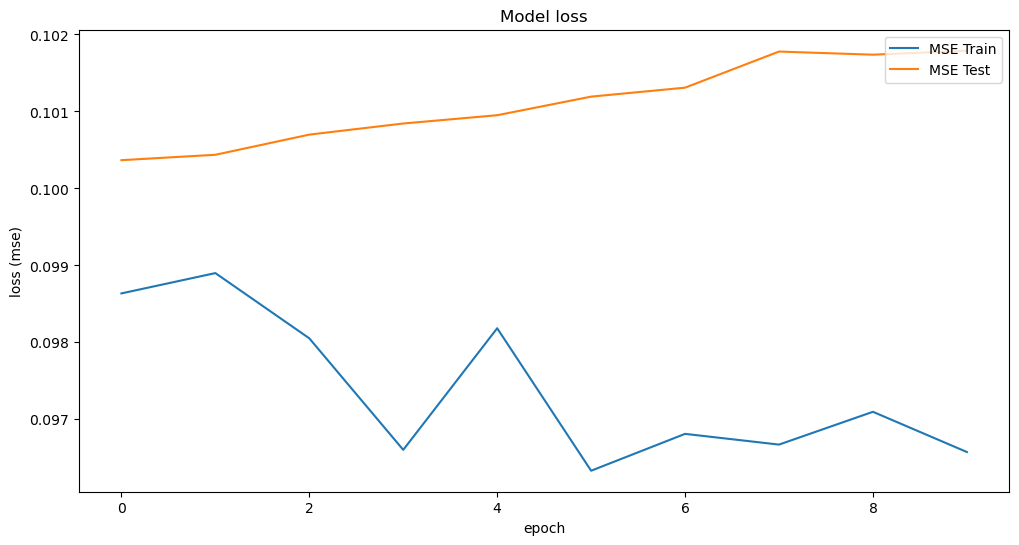

In [23]:
#set the plot size
plt.figure(figsize=(12,6))

plt.plot(model.history.history['loss'][:])
plt.plot(model.history.history['val_loss'][:])

plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss (mse)')
plt.legend(['MSE Train', 'MSE Test'], loc='upper right')


Looks like a simple ANN trained with this dataset is overfitting.

### Confusion Matrix

In [24]:
### CREATE A FUNCTION TO PLOT THE CONFUSION MATRIX ###

# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(12,12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontdict = {'fontsize':30})
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontdict = {'fontsize':12}, ha = 'right')
    plt.yticks(tick_marks, classes, fontdict = {'fontsize':12})

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observation',fontdict = {'fontsize':30})
    plt.xlabel('Prediction',fontdict = {'fontsize':30})

1/1 [==============================] - 0s 43ms/step


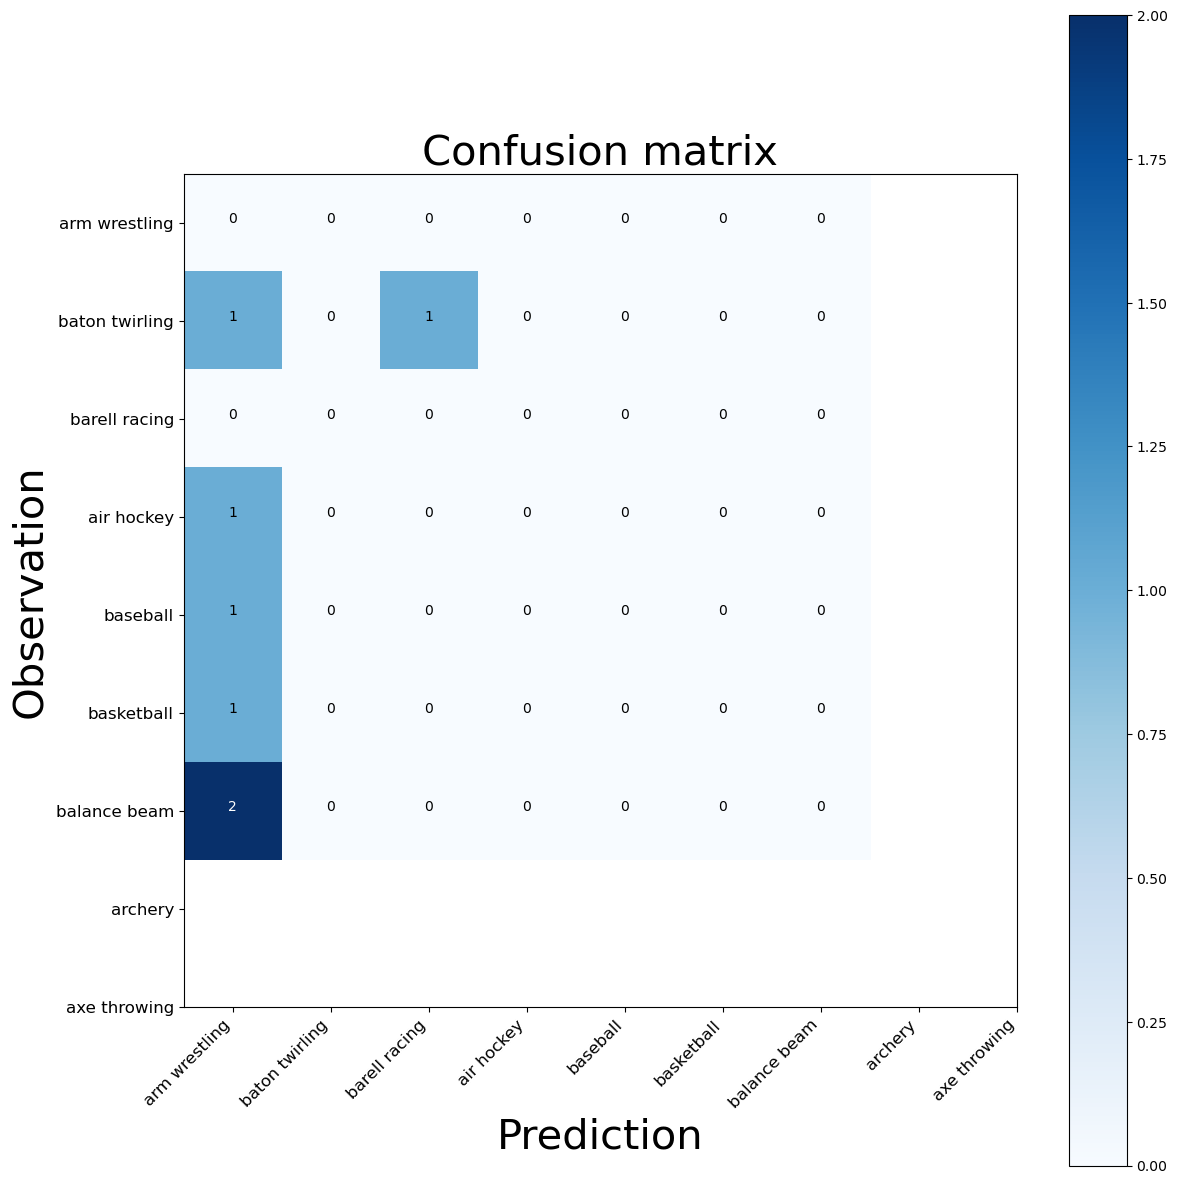

In [25]:
### MAKE PREDICTIONS USING THE FIRST MODEL AND PLOT THE CONFUSION MATRIX ###

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = categories)

In [26]:
ann_pred = model.predict(X_test)

for i in range (0,4):
    print('Prediction: ', ann_pred[i], ', True Value: ', y_test[i],'\n')

1/1 [==============================] - 0s 18ms/step
Prediction:  [0.12874429 0.09268864 0.1189112  0.10058165 0.10763492 0.12037025
 0.11393437 0.1025029  0.11463179] , True Value:  [0. 0. 0. 0. 1. 0. 0. 0. 0.] 

Prediction:  [0.1299456  0.09651557 0.14502774 0.09154972 0.11794745 0.11277105
 0.10358788 0.07876141 0.12389363] , True Value:  [0. 1. 0. 0. 0. 0. 0. 0. 0.] 

Prediction:  [0.14897692 0.09906311 0.11155373 0.09277811 0.11569106 0.10455412
 0.1046868  0.09560008 0.12709606] , True Value:  [0. 0. 0. 0. 0. 0. 0. 1. 0.] 

Prediction:  [0.14620107 0.10309114 0.1246744  0.08805147 0.11589595 0.1197921
 0.10815511 0.08319264 0.11094613] , True Value:  [0. 1. 0. 0. 0. 0. 0. 0. 0.] 



The predictions made by the ANN are not too bad even though we are still overfitting.

# CNN

In [27]:
cnn_mdl = Sequential()

cnn_mdl.add(Conv2D(50,kernel_size = (3,3), padding = 'same', activation = 'relu', input_shape = (100, 100, 3)))
cnn_mdl.add(Dropout(0.3))

cnn_mdl.add(Conv2D(25,kernel_size = (3,3), padding = 'same', activation = 'relu'))
cnn_mdl.add(Dropout(0.3))

cnn_mdl.add(MaxPooling2D(pool_size = (2,2), strides = 2))
cnn_mdl.add(Dropout(0.3))

cnn_mdl.add(Flatten())

cnn_mdl.add(Dense(50, activation = 'relu'))
cnn_mdl.add(Dropout(0.3))

cnn_mdl.add(Dense(categories_length, activation = 'softmax'))

cnn_mdl.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

cnn_mdl.summary()

cnn_history = cnn_mdl.fit(X_train, y_train, batch_size = 24, epochs = 10, verbose = 1, validation_data = (X_test, y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 50)      1400      
                                                                 
 dropout_2 (Dropout)         (None, 100, 100, 50)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 25)      11275     
                                                                 
 dropout_3 (Dropout)         (None, 100, 100, 25)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 25)        0         
 D)                                                              
                                                                 
 dropout_4 (Dropout)         (None, 50, 50, 25)        0         
                                                      

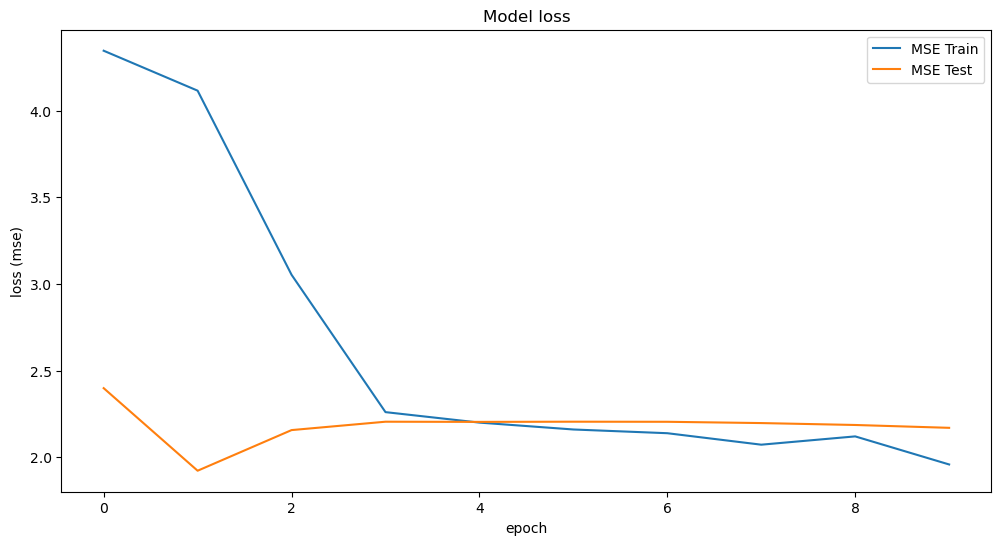

In [28]:
#set the plot size
plt.figure(figsize=(12,6))

plt.plot(cnn_history.history['loss'][:])
plt.plot(cnn_history.history['val_loss'][:])

plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss (mse)')
plt.legend(['MSE Train', 'MSE Test'], loc='upper right')


Based on the results a simple ANN works better than convolution with this dataset. Even though the ANN was overfitting, the number that the test error reached on the ANN was way smaller, ANN MSE .0731 vs CNN MSE 1.587.


1/1 [==============================] - 0s 39ms/step


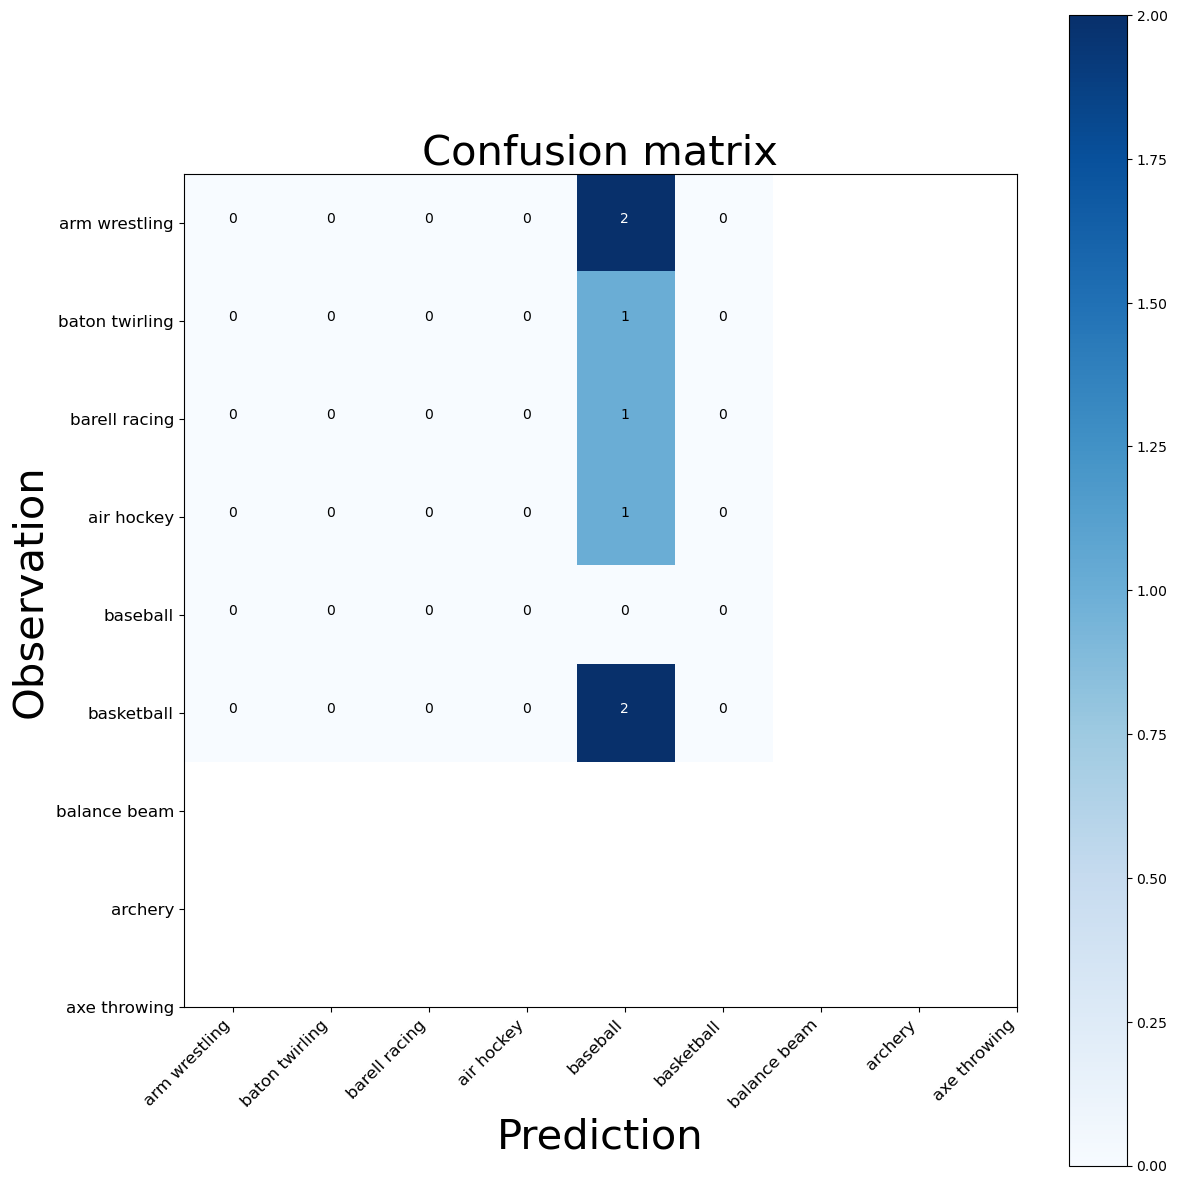

In [29]:
# Predict the values from the validation dataset
cnn_Y_pred = cnn_mdl.predict(X_test)
# Convert predictions classes to one hot vectors 
cnn_Y_pred_classes = np.argmax(cnn_Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
cnn_Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
cnn_confusion_mtx = confusion_matrix(cnn_Y_true, cnn_Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(cnn_confusion_mtx, classes = categories)

In [30]:
cnn_pred = cnn_mdl.predict(X_test)

for a in range (0,4):
    print('Prediction: ', cnn_pred[a], ', True Value: ', y_test[a],'\n')

1/1 [==============================] - 0s 24ms/step
Prediction:  [0.11199274 0.10211862 0.11430184 0.11041294 0.10555662 0.10432643
 0.1247352  0.11768821 0.10886738] , True Value:  [0. 0. 0. 0. 1. 0. 0. 0. 0.] 

Prediction:  [0.10561889 0.10401513 0.11441235 0.11136588 0.10600813 0.11138859
 0.12193066 0.11747684 0.1077835 ] , True Value:  [0. 1. 0. 0. 0. 0. 0. 0. 0.] 

Prediction:  [0.11627138 0.10123678 0.11787845 0.1016073  0.09942835 0.098093
 0.13712765 0.12055145 0.10780563] , True Value:  [0. 0. 0. 0. 0. 0. 0. 1. 0.] 

Prediction:  [0.11104075 0.10733321 0.10966412 0.11152912 0.1115399  0.10975944
 0.1172312  0.11135454 0.11054768] , True Value:  [0. 1. 0. 0. 0. 0. 0. 0. 0.] 



Looking at the confusion matrix makes it easy to see how well each model made predictions. The CNN model made better predictions but only because of overfitting. The CNN model is better at remembering the features and not generalising.

# Autoencoder

In [31]:
import numpy as np
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D

import matplotlib.pyplot as plt
%matplotlib inline

import random

#### SIGMOID ACTIVATION FUNCTION

In [32]:
denoising_encoder = keras.models.Sequential([
    keras.layers.GaussianNoise(0.1, input_shape=[100, 100, 3]),
    keras.layers.Conv2D(categories_length, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
])

In [33]:
denoising_encoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gaussian_noise (GaussianNo  (None, 100, 100, 3)       0         
 ise)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 9)       252       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 50, 50, 9)         0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 22500)             0         
                                                                 
 dense_5 (Dense)             (None, 512)               11520512  
                                                                 
Total params: 11520764 (43.95 MB)
Trainable params: 11

In [34]:
denoising_decoder = keras.models.Sequential([
    keras.layers.Dense(50 * 50 * 100, activation="relu", input_shape=[512]),
    keras.layers.Reshape([50, 50, 100]),
    keras.layers.Conv2DTranspose(filters=3, kernel_size=3, strides=2,
                                 padding="same", activation="sigmoid")])

In [35]:
denoising_decoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 250000)            128250000 
                                                                 
 reshape (Reshape)           (None, 50, 50, 100)       0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 100, 100, 3)       2703      
 anspose)                                                        
                                                                 
Total params: 128252703 (489.25 MB)
Trainable params: 128252703 (489.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
denoising_ae = keras.models.Sequential([denoising_encoder, denoising_decoder])
# compile the model
denoising_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Nadam(), metrics=["mse"])
# history of the model
history = denoising_ae.fit(X_train, X_train, epochs=10 , validation_data=(X_test, X_test))

Epoch 1/10
2/2 [==============================] - 4s 1s/step - loss: 0.6933 - mse: 0.0870 - val_loss: 0.6912 - val_mse: 0.0817
Epoch 2/10
2/2 [==============================] - 3s 1s/step - loss: 0.6928 - mse: 0.0867 - val_loss: 0.6913 - val_mse: 0.0817
Epoch 3/10
2/2 [==============================] - 3s 1s/step - loss: 0.6895 - mse: 0.0851 - val_loss: 0.6835 - val_mse: 0.0778
Epoch 4/10
2/2 [==============================] - 3s 1s/step - loss: 0.6853 - mse: 0.0829 - val_loss: 0.6774 - val_mse: 0.0747
Epoch 5/10
2/2 [==============================] - 3s 1s/step - loss: 0.6840 - mse: 0.0822 - val_loss: 0.6723 - val_mse: 0.0722
Epoch 6/10
2/2 [==============================] - 4s 2s/step - loss: 0.6810 - mse: 0.0807 - val_loss: 0.6731 - val_mse: 0.0726
Epoch 7/10
2/2 [==============================] - 3s 1s/step - loss: 0.6741 - mse: 0.0775 - val_loss: 0.6746 - val_mse: 0.0734
Epoch 8/10
2/2 [==============================] - 2s 681ms/step - loss: 0.6664 - mse: 0.0738 - val_loss: 0.6691

1/1 [==============================] - 0s 51ms/step


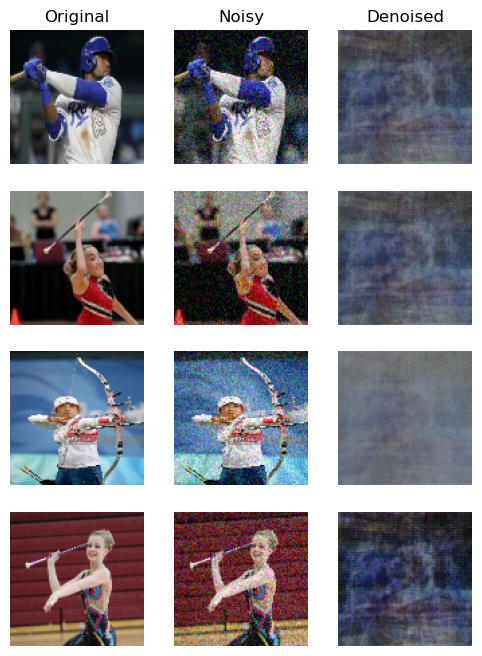

In [37]:
n_images = 4
new_images = X_test[:n_images]
rgb_new_images = new_images[...,::-1]
new_images_noisy = rgb_new_images + np.random.randn(n_images, 100, 100, 3) * 0.1
new_images_denoised = denoising_ae.predict(new_images_noisy)

plt.figure(figsize=(6, n_images * 2))
for index in range(n_images):
    plt.subplot(n_images, 3, index * 3 + 1)
    plt.imshow(rgb_new_images[index])
    plt.axis('off')
    if index == 0:
        plt.title("Original")
    plt.subplot(n_images, 3, index * 3 + 2)
    plt.imshow(np.clip(new_images_noisy[index], 0., 1.))
    plt.axis('off')
    if index == 0:
        plt.title("Noisy")
    plt.subplot(n_images, 3, index * 3 + 3)
    plt.imshow(new_images_denoised[index])
    plt.axis('off')
    if index == 0:
        plt.title("Denoised")
plt.show()

#### SOFTMAX ACTIVATION FUNCITON

In [38]:
denoising_encoder_sftmx = keras.models.Sequential([
    keras.layers.GaussianNoise(0.1, input_shape=[100, 100, 3]),
    keras.layers.Conv2D(categories_length, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
])

denoising_encoder_sftmx.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gaussian_noise_1 (Gaussian  (None, 100, 100, 3)       0         
 Noise)                                                          
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 9)       252       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 50, 50, 9)         0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 22500)             0         
                                                                 
 dense_7 (Dense)             (None, 512)               11520512  
                                                                 
Total params: 11520764 (43.95 MB)
Trainable params: 11

In [39]:
denoising_decoder_sftmx = keras.models.Sequential([
    keras.layers.Dense(50 * 50 * 100, activation="relu", input_shape=[512]),
    keras.layers.Reshape([50, 50, 100]),
    keras.layers.Conv2DTranspose(filters=3, kernel_size=3, strides=2,
                                 padding="same", activation="softmax")])
denoising_decoder_sftmx.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 250000)            128250000 
                                                                 
 reshape_1 (Reshape)         (None, 50, 50, 100)       0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 100, 100, 3)       2703      
 Transpose)                                                      
                                                                 
Total params: 128252703 (489.25 MB)
Trainable params: 128252703 (489.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
denoising_ae_sftmx = keras.models.Sequential([denoising_encoder_sftmx, denoising_decoder_sftmx])
# compile the model
denoising_ae_sftmx.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Nadam(), metrics=["mse"])
# history of the model
history_sftmx = denoising_ae_sftmx.fit(X_train, X_train, epochs=10, validation_data=(X_test, X_test))

Epoch 1/10
2/2 [==============================] - 4s 1s/step - loss: 0.6930 - mse: 0.0885 - val_loss: 0.6829 - val_mse: 0.0641
Epoch 2/10
2/2 [==============================] - 2s 1s/step - loss: 0.6955 - mse: 0.0891 - val_loss: 0.6858 - val_mse: 0.0629
Epoch 3/10
2/2 [==============================] - 2s 1s/step - loss: 0.6856 - mse: 0.0876 - val_loss: 0.6750 - val_mse: 0.0635
Epoch 4/10
2/2 [==============================] - 3s 1s/step - loss: 0.6823 - mse: 0.0879 - val_loss: 0.6741 - val_mse: 0.0636
Epoch 5/10
2/2 [==============================] - 3s 2s/step - loss: 0.6724 - mse: 0.0874 - val_loss: 0.6661 - val_mse: 0.0638
Epoch 6/10
2/2 [==============================] - 3s 1s/step - loss: 0.6698 - mse: 0.0884 - val_loss: 0.6744 - val_mse: 0.0622
Epoch 7/10
2/2 [==============================] - 3s 1s/step - loss: 0.6543 - mse: 0.0870 - val_loss: 0.6799 - val_mse: 0.0624
Epoch 8/10
2/2 [==============================] - 3s 1s/step - loss: 0.6554 - mse: 0.0882 - val_loss: 0.6862 - 

1/1 [==============================] - 0s 46ms/step


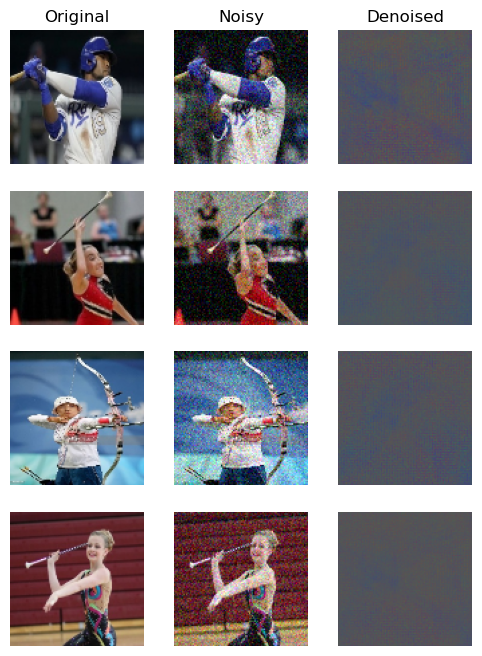

In [41]:
n_images = 4
new_images_m = X_test[:n_images]
rgb_new_images_m = new_images[...,::-1]
new_images_noisy_m = rgb_new_images_m + np.random.randn(n_images, 100, 100, 3) * 0.1
new_images_denoised_m = denoising_ae_sftmx.predict(new_images_noisy_m)

plt.figure(figsize=(6, n_images * 2))
for index in range(n_images):
    plt.subplot(n_images, 3, index * 3 + 1)
    plt.imshow(rgb_new_images_m[index])
    plt.axis('off')
    if index == 0:
        plt.title("Original")
    plt.subplot(n_images, 3, index * 3 + 2)
    plt.imshow(np.clip(new_images_noisy_m[index], 0., 1.))
    plt.axis('off')
    if index == 0:
        plt.title("Noisy")
    plt.subplot(n_images, 3, index * 3 + 3)
    plt.imshow(new_images_denoised_m[index])
    plt.axis('off')
    if index == 0:
        plt.title("Denoised")
plt.show()

# Summary and Conclusion
### Since we did the first project with black and white colors, I was not able to recieve an accuracy score of .72 
### or higher at 60 epochs of training. Now, by adding color, the accuracy is lower than .72 
### but the dataset is much smaller.  Therefore, I believe, if the dataset was much bigger, then, adding color will
### produce an accuracy higher than .72 at 60 or higher epochs.

# Autoencoders
### The sigmoid activation function seems to work a lot better than softmax in the decoder. 
### Therefore, using the softmas activation function is producing a higher accuracy

### Loving this project. Me gusto mucho!